In [6]:
import numpy as np
A = np.random.randint(0,10,size=(4,4))
print(A)
c = (1,3)
c_complement = (0,2)
print(A[:,c])
print(A[:,c_complement])
print(np.diag(A[:,c_complement]))

import itertools
for c in itertools.combinations(range(8),):
    print(c)

[[2 0 9 7]
 [2 8 0 7]
 [9 8 6 6]
 [8 9 2 5]]
[[0 7]
 [8 7]
 [8 6]
 [9 5]]
[[2 9]
 [2 0]
 [9 6]
 [8 2]]
[2 0]


ValueError: r must be non-negative

Rose


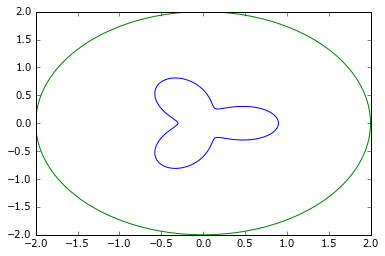

Astroid


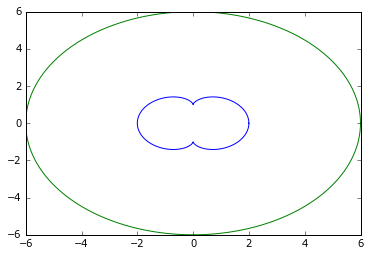

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t = np.linspace(0,2*np.pi,1000)
x = 0.3*(2 + np.cos(3*t))*np.cos(t)
y = 0.3*(2 + np.cos(3*t))*np.sin(t)

print "Rose"
plt.plot(x,y)
plt.plot(2*np.cos(t), 2*np.sin(t))
plt.show()

print "Astroid"
x = 0.5*(3*np.cos(t) + np.cos(3*t))
y = 0.5*(3*np.sin(t) + np.sin(3*t))
plt.plot(x,y)
plt.plot(6*np.cos(t), 6*np.sin(t))
plt.show()

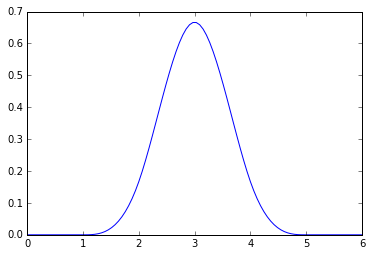

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

arr = np.array([-1.,0.,0.,0.,1.,1.,1.,2.])

def find_ind(x):
    if len(np.argwhere(arr<=x)>0):
        return np.argwhere(arr<=x)[-1]
    else:
        return -1
    
def one_basis_func(p,m,U,i,u):
    """Compute the basis function N_ip.

    p is the degree. U is the knot vector. m is the index of the furthest knot,
    so m = len(U) - 1, getting the ith basis function, at the point u.
    """

    # Special cases
    #if (i == 0 and u == U[0]) or (i == m-p-1 and u == U[m]): 
    #    return 1.0

    # Local property
    if u < U[i] or u >= U[i+p+1]:
        return 0.0

    # Initialize zeroth degree functions
    N = np.zeros(p+1)
    for j in xrange(p+1):
        if u >= U[i+j] and u < U[i+j+1]:
            N[j] = 1.0
        else:
            N[j] = 0.0
    for k in xrange(1,p+1):
        if N[0] == 0.0:
            saved = 0.0
        else:
            saved = ((u-U[i])*N[0])/(U[i+k]-U[i])
        for j in xrange(p-k+1):
            Uleft = U[i+j+1]
            Uright = U[i+j+k+1]
            if N[j+1] == 0.0:
                N[j] = saved
                saved = 0.0
            else:
                temp = N[j+1]/(Uright-Uleft)
                N[j] = saved + (Uright-u)*temp
                saved = (u-Uleft)*temp
    return N[0]

def basis_plot(knot_vec):
    n = 100
    dom = np.linspace(knot_vec[0]-1,knot_vec[-1]+1,n)
    y = np.zeros(n)
    for i in xrange(n):
        y[i] = one_basis_func(3,4,knot_vec,0,dom[i])
    plt.plot(dom,y)
    plt.show()
    
basis_plot(np.array([1,2,3,4,5]))

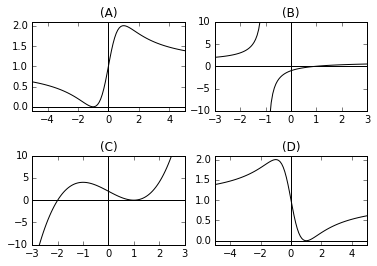

In [100]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

d = np.linspace(-3,3.1,100)
d0 = np.linspace(-5,5.1,100)
fD = (d0-1)**2/(d0**2+1)
fA = -1*(d0-1)**2/(d0**2+1)+2

fb = (d[d<-1]-1)/(d[d<-1]+1)
fB = (d[d>-1]-1)/(d[d>-1]+1)

fC = (d-1)**2*(d+2)

plt.subplot(221)
plt.plot(d0,fA,color='black')
plt.xlim([-5,5])
plt.ylim([-0.1,2.1])
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.title('(A)')

plt.subplot(222)
plt.plot(d[d<-1],fb,color='black')
plt.plot(d[d>-1],fB,color='black')
plt.xlim([-3,3])
plt.ylim([-10,10])
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.title('(B)')

plt.subplot(223)
plt.plot(d,fC,color='black')
plt.xlim([-3,3])
plt.ylim([-10,10])
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.title('(C)')

plt.subplot(224)
plt.plot(d0,fD,color='black')
plt.xlim([-5,5])
plt.ylim([-0.1,2.1])
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.title('(D)')

plt.subplots_adjust(hspace=0.5)
plt.savefig('112exam3curvesketchingMC.png',dpi=200)


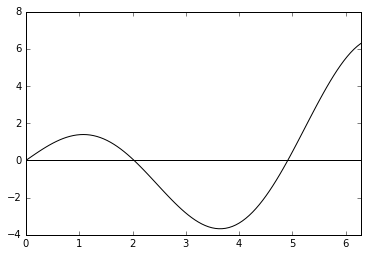

In [101]:
x = np.linspace(0,2*np.pi,100)
plt.plot(x,np.sin(x)+x*np.cos(x),color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.xlim([0,2*np.pi])
plt.savefig('112exam3derivsketchMCquestion.png',dpi=200)

3


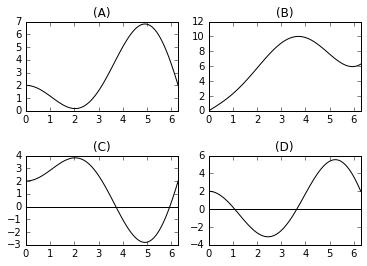

In [102]:
x = np.linspace(0,2*np.pi,100)

plt.subplot(221)
plt.plot(x,-x*np.sin(x)+2,color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.xlim([0,2*np.pi])
plt.title('(A)')

plt.subplot(222)
plt.plot(x,2*x+np.sin(x)-x*np.cos(x),color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.xlim([0,2*np.pi])
#plt.ylim([-10,10])
plt.title('(B)')

plt.subplot(223)
plt.plot(x,x*np.sin(x)+2,color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.xlim([0,2*np.pi])
plt.title('(C)')

plt.subplot(224)
plt.plot(x,2*np.cos(x)-x*np.sin(x),color='black')
plt.axhline(y=0,color='black')
plt.axvline(x=0,color='black')
plt.xlim([0,2*np.pi])
plt.title('(D)')

plt.subplots_adjust(hspace=0.5)
plt.savefig('112exam3derivsketchMCoptions.png',dpi=200)

print min(3,4)

In [43]:
from __future__ import division
import numpy as np
import csv

results = []
i = 0
with open('112exam2results.csv') as exam2:
    row_reader = csv.reader(exam2)
    for row in row_reader:
        if i == 0:
            print row
        if 'Grover' in row[2]:
            print row
            
        i += 1
        results.append(row)
        
results = results[1:]
scores = []
for i in xrange(len(results)):
    scores.append([float(results[i][3]),float(results[i][4])])
scores = np.array(scores)    

for i in xrange(15,22):
    section = scores[scores[:,0]==i]
    print "Section", i, ":", np.mean(section[:,1])
    if i==17:
        sec17 = section[:,1]
    if i==19:
        sec19 = section[:,1]
    if i==20:
        sec20 = section[:,1]
    
string = "Everybody else average:"
sec17sub = np.array([99,76,70,63,93,59,78,75,77,89,88,70,93,83,72,93
                  ,85,67,76,97,99,87,64])
print len(sec17)-len(sec17sub)
print "Section 17 come-to-class average: ", np.mean(sec17sub)
print string, (np.sum(sec17)-np.sum(sec17sub))/(len(sec17)-len(sec17sub))

sec19sub = np.array([87,97,90,88,72,78,99,70,88,81,93,68,66,95,94,83,
                  85,64,59,52,62,78,73,93])
print len(sec19)-len(sec19sub)
print "Section 19 come-to-class average: ", np.mean(sec19sub)
print string, (np.sum(sec19)-np.sum(sec19sub))/(len(sec19)-len(sec19sub))

sec20sub = np.array([68,80,100,81,96,78,90,72,89,96,93,90,50,94,86,84,
                  87,84,22,35,78,98,64,100,60,94,99,67])
print len(sec20)-len(sec20sub)

print "Section 20 come-to-class average: ", np.mean(sec20sub)
print string, (np.sum(sec20)-np.sum(sec20sub))/(len(sec20)-len(sec20sub))

good_students = np.hstack((sec17sub,sec20sub,sec19sub))
print "\nTotal come-to-class average:", np.mean(good_students)
numerator = np.sum(sec20)+np.sum(sec19)+np.sum(sec17)-np.sum(good_students)
print "Total everybody else average:", numerator/(len(sec20)+len(sec19)+len(sec17)-len(good_students))

print "Average across sections: ", np.mean(scores[:,1])

['Exam', 'A:BYU ID', 'Name', 'Section #', 'total', 'max', 'A-1-1', 'A-1-10', 'A-1-11', 'A-1-12', 'A-1-2', 'A-1-3', 'A-1-4', 'A-1-5', 'A-1-6', 'A-1-7', 'A-1-8', 'A-1-9', 'B-1-1', 'B-1-2', 'B-1-3', 'B-1-4', 'B-1-5', 'B-1-6', 'B-1-7', 'BYUID']
['647', '468132870', 'Grover, Thomas Richard', '20', '90.', '100.', '4.', '4.', '4.', '4.', '4.', '4.', '0.', '4.', '4.', '4.', '4.', '4.', '7.', '8.', '8.', '5.', '3.', '7.', '8.', '468132870']
Section 15 : 72.7058823529
Section 16 : 72.0322580645
Section 17 : 72.0731707317
Section 18 : 75.8888888889
Section 19 : 77.0
Section 20 : 76.0909090909
Section 21 : 78.8333333333
18
Section 17 come-to-class average:  80.5652173913
Everybody else average: 61.2222222222
10
Section 19 come-to-class average:  79.7916666667
Everybody else average: 70.3
5
Section 20 come-to-class average:  79.8214285714
Everybody else average: 55.2

Total come-to-class average: 80.04
Total everybody else average: 63.0606060606
Average across sections:  74.7956521739


In [33]:
sec15 = np.array([30, 37, 40, 48, 53, 53, 55, 56, 57, 62, 64, 67, 70, 70, 73,
                 74, 76, 77, 77, 77, 78, 80, 80, 80, 81, 82, 84, 84, 85, 88,
                 89, 90, 90, 94, 95])

sec16 = np.array([22, 34, 46, 47, 48, 48, 50, 54, 59, 62, 65, 69, 70, 72, 73, 
                  74, 74, 74, 78, 80, 82, 82, 83, 83, 83, 86, 86, 86, 86, 87, 
                  91, 91, 95, 100])

sec17 = np.array([32, 38, 41, 54, 55, 56, 58, 58, 58, 60, 61, 66, 66, 67, 68, 
                  69, 71, 71, 74, 76, 77, 81, 82, 82, 82, 83, 84, 85, 86, 87, 
                  88, 89, 89, 90, 92, 94, 95, 97, 99, 99])

sec18 = np.array([34, 42, 46, 52, 57, 57, 59, 62, 67, 67, 68, 71, 75, 76, 76, 
                  78, 79, 79, 82, 82, 82, 84, 86, 86, 87, 88, 92, 93, 96, 99])

sec19 = np.array([28, 44, 45, 47, 51, 57, 59, 68, 69, 71, 72, 72, 73, 73, 73,
                 76, 79, 79, 81, 81, 86, 86, 87, 88, 88, 88, 88, 88, 88, 89,
                 92, 95, 96, 96, 98])

sec20 = np.array([30, 37, 41, 46, 50, 54, 59, 69, 73, 75, 76, 78, 81, 82, 82,
                 83, 83, 84, 84, 87, 87, 87, 87, 88, 88, 90, 90, 91, 96, 96,
                 96, 98, 100])

sec21 = np.array([32, 33, 48, 60, 64, 64, 68, 69, 72, 73, 75, 75, 77, 79, 79,
                 80, 82, 86, 86, 86, 86, 87, 87, 89, 89, 94, 95, 96, 99, 99, 100])

print "Section 15: ", np.mean(sec15)
print "Section 16: ", np.mean(sec16)
print "Section 17: ", np.mean(sec17)
print "Section 18: ", np.mean(sec18)
print "Section 19: ", np.mean(sec19)
print "Section 20: ", np.mean(sec20)
print "Section 21: ", np.mean(sec21)

def C(x):
    return 2000 + 3.0*x + .01*x**2 + .0002*x**3

print C(101) - C(100)

Section 15:  71.3142857143
Section 16:  71.1764705882
Section 17:  74.0
Section 18:  73.4
Section 19:  75.7428571429
Section 20:  77.2121212121
Section 21:  77.7096774194
11.0702


[0 0 0 4 8 8 8]


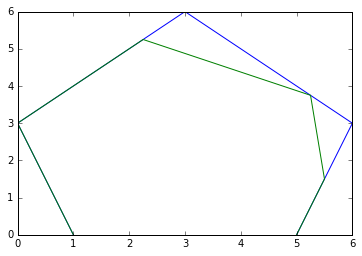

[ 0.  0.  0.  4.  6.  8.  8.  8.] [[ 1.    0.    1.  ]
 [ 0.    3.    1.  ]
 [ 2.25  5.25  1.75]
 [ 5.25  3.75  1.25]
 [ 5.5   1.5   1.  ]
 [ 5.    0.    1.  ]]
[0 0 0 4 8 8 8]


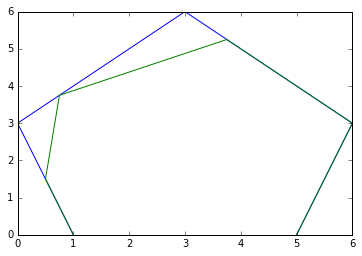

[ 0.  0.  0.  2.  4.  8.  8.  8.] [[ 1.    0.    1.  ]
 [ 0.5   1.5   1.  ]
 [ 0.75  3.75  1.25]
 [ 3.75  5.25  1.75]
 [ 6.    3.    1.  ]
 [ 5.    0.    1.  ]]


(array([ 0.,  0.,  0.,  2.,  4.,  8.,  8.,  8.]), array([[ 1.  ,  0.  ,  1.  ],
        [ 0.5 ,  1.5 ,  1.  ],
        [ 0.75,  3.75,  1.25],
        [ 3.75,  5.25,  1.75],
        [ 6.  ,  3.  ,  1.  ],
        [ 5.  ,  0.  ,  1.  ]]))

In [22]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

knots = np.array([0,0,0,4,8,8,8])
pts = np.array([[1,0,1],[0,3,1],[3,6,2],[6,3,1],[5,0,1]])
t = 2

def insert_knot(knots, pts, t):
    print knots
    new_knots = np.zeros(len(knots)+1)
    i = 0
    while knots[i] < t:
        new_knots[i] = knots[i]
        i += 1
    new_knots[i] = t
    for j in xrange(i+1,len(knots)+1):
        new_knots[j] = knots[j-1]
    
# The knot is inserted between index i-1 and i
    new_pts = np.zeros((len(pts)+1,3))
    for j in xrange(i-2):
        new_pts[j,:] = pts[j,:]

    for j in xrange(i-2,i+1):
        # j = i-2, i-1, i
        c = (t - knots[j-1])/(knots[j+2] - knots[j-1])
        new_pts[j,:] = (1-c)*pts[j-1,:] + c*pts[j,:]

    for j in xrange(i+1,len(pts)+1):
        new_pts[j,:] = pts[j-1,:] 

    plt.plot(pts[:,0],pts[:,1])
    plt.plot(new_pts[:,0],new_pts[:,1])
    plt.show()
    print new_knots, new_pts
    return new_knots, new_pts

insert_knot(knots, pts, 6)
insert_knot(knots, pts, 2)

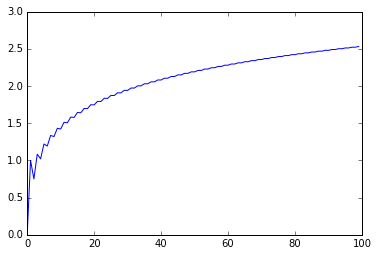

[0 1 2 3 4 5]
[0 1 3 5 7 9]
[ 0  1  4  8 12 16]
[ 0  1  4 12 20 28]
[ 0  1  4 12 32 48]
[ 0  1  4 12 32 80]
[[7 8 9]
 [4 5 6]
 [1 2 3]]


In [47]:
from __future__ import division
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

N = 100
out = np.zeros(N)
for i in xrange(1,N):
    out[i] = out[i-1] + (-1)**(i+1)/i**(2-i%2)
    
plt.plot(np.arange(N), out)
plt.show()
#for i in xrange(1,N):
#    print i, out[i]

n = 6
fvals = np.arange(n)
print fvals
for i in xrange(1,len(fvals)):
    for j in xrange(n-1,i-1,-1):
        fvals[j] += fvals[j-1]
    #fvals[i:] += fvals[i-1:-1]
    print fvals
    
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print A[::-1,:]

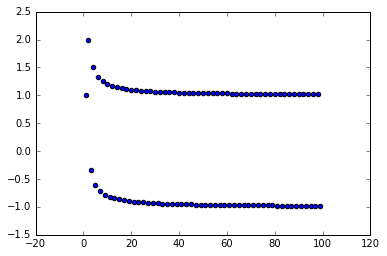

In [48]:
N = 100
d = np.arange(1,N)
out = (-1)**d + 2.0/d
plt.scatter(d,out)
plt.show()

In [15]:
from decimal import *


def fdtest(precision):
    getcontext().prec = precision
    
    x0, x1, x2, x3 = Decimal(2), Decimal(11), Decimal(397), Decimal(431)
    nfound = False
    for n in xrange(1, 1500):
        dt = Decimal(1)/Decimal(n)
        
        f0 = Decimal(2)
        t = dt
        u = Decimal(1)-t
        
        f1 = x0*u*u*u + Decimal(3)*x1*u*u*t + Decimal(3)*x2*u*t*t + x3*t*t*t
        
        t = Decimal(2)*dt
        u = Decimal(1)-t
        f2 = x0*u*u*u + Decimal(3)*x1*u*u*t + Decimal(3)*x2*u*t*t + x3*t*t*t
        
        t = Decimal(3)*dt
        u = Decimal(1)-t
        f3 = x0*u*u*u + Decimal(3)*x1*u*u*t + Decimal(3)*x2*u*t*t + x3*t*t*t
        
        g0 = f1 - f0
        g1 = f2 - f1
        g2 = f3 - f2
        h0 = g1 - g0
        h1 = g2 - g1
        c = h1 - h0
        
        for i in xrange(4,n+1):
            h1 += c
            g2 += h1
            f3 += g2
          
        if abs(f3-x3) > 0.5:
            print n, abs(f3-x3), x3
            nfound = True
            break
        #print "%d, %lf\n",n,f3-x3
    
    if not nfound:
        print "n not found"
        
for i in xrange(1,28):
    print 'Precision: ', i
    fdtest(i)

Precision:  1


NameError: global name 'copy_abs' is not defined

In [23]:
import numpy as np

def f(x):
    return np.sqrt(2+x)
    
x = np.sqrt(2)
for i in xrange(100):
    print x
    x = f(x)

1.41421356237
1.84775906502
1.96157056081
1.99036945334
1.99759091241
1.99939763739
1.99984940368
1.99996235057
1.99999058762
1.9999976469
1.99999941173
1.99999985293
1.99999996323
1.99999999081
1.9999999977
1.99999999943
1.99999999986
1.99999999996
1.99999999999
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


In [3]:
import numpy as np
from matplotlib import pyplot as plt

X, Y = np.meshgrid (np.arange(-5,5,.2), np.arange(-5,5,.2))
U = 4*Y
V = -1.0*X + 4.0*Y

plt.figure()
Q = plt.quiver(U, V)
l, r, b, t = plt.axis()
dx, dy = r - l, t - b
plt.axis([l - 0.05*dx, r + 0.05*dx, b - 0.05*dy, t + 0.05*dy])
plt.show()

In [4]:
import numpy as np
n = 10000

for i in xrange(99999999,100000005):
    print i, i - np.sqrt(i**2+2*i)

99999999 -1.0
100000000 -1.0
100000001 -1.0
100000002 -1.0
100000003 -1.0
100000004 -1.0


[ 0.    0.25  0.5   0.75  1.  ]


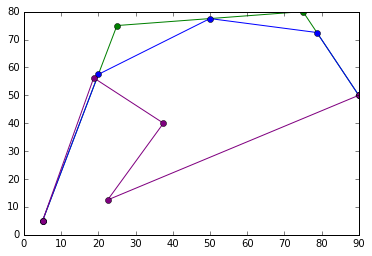

In [86]:
import numpy as np
from matplotlib import pyplot as plt

def elevate(P,n,m):
    # Degree elevate P (n+1 by dim array)
    
    
    for i in xrange(m):
        alpha = 1.0*np.arange(n+2)/(n+1)
        Q = np.zeros((n+2,P.shape[1]))
        Q[0,:] = (1-alpha[0])*P[0,:]
        for j in xrange(1,n+1):
            Q[j,:] = alpha[j]*P[j-1,:] + (1-alpha[j])*P[j,:]
        Q[n+1,:] = alpha[n+1]*P[n,:]
        
        plt.plot(Q[:,0],Q[:,1],'-o',color='blue')
            
        print alpha
        alpha = np.vstack((alpha, alpha, alpha)).T

        Q = np.zeros((P.shape[0]+1,P.shape[1]))
        Q[1:,:] = alpha[1:,:]*P
        Q[:-1,:] = (1-alpha[:-1,:])*P

        P = Q
        n += 1
        
    plt.plot(P[:,0],P[:,1],'-o',color='purple')
    plt.show()
    
P = np.array([[5, 25, 75, 90],[5, 75, 80, 50],[1,1,1,1]],dtype=np.float).T
plt.plot(P[:,0],P[:,1],'-o',color='g')
elevate(P,3,1)

[[  5.  25.  75.  90.]
 [  5.  75.  80.  50.]
 [  1.   1.   1.   1.]]
[[  5.     15.     32.5    49.375]
 [  5.     40.     58.75   65.   ]
 [  1.      1.      1.      1.   ]]
[[ 49.375  66.25   82.5    90.   ]
 [ 65.     71.25   65.     50.   ]
 [  1.      1.      1.      1.   ]]
[[  5.        10.        16.875     24.609375]
 [  5.        22.5       35.9375    45.78125 ]
 [  1.         1.         1.         1.      ]]
[[ 24.609375  32.34375   40.9375    49.375   ]
 [ 45.78125   55.625     61.875     65.      ]
 [  1.         1.         1.         1.      ]]
[[ 49.375     57.8125    66.09375   73.203125]
 [ 65.        68.125     68.125     65.46875 ]
 [  1.         1.         1.         1.      ]]
[[ 73.203125  80.3125    86.25      90.      ]
 [ 65.46875   62.8125    57.5       50.      ]
 [  1.         1.         1.         1.      ]]


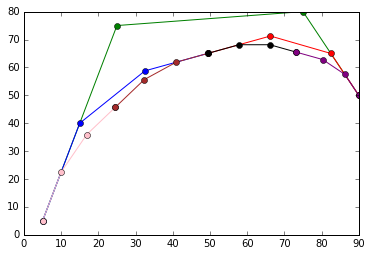

[ 0.          0.33333333  0.66666667  1.        ]
[[ 0.          0.33333333  0.66666667  1.        ]
 [ 0.          0.33333333  0.66666667  1.        ]
 [ 0.          0.33333333  0.66666667  1.        ]]
[ 1.          0.66666667  0.33333333  0.        ]


In [80]:
import numpy as np
from matplotlib import pyplot as plt

def deCasteljua(P,n,u):
    
    Q = np.copy(P)
    Q0 = np.copy(P)
    # P is an array of points; each column is a point
    for k in xrange(1,n+1):
        for i in xrange(n-k+1):
            Q[:,i] = (1.0-u)*Q[:,i] + u*Q[:,i+1]
        Q0[:,k] = Q[:,0]
    return Q0, Q

#P = np.array([[0,6,0,24],[0,0,8,24],[1,3,1,3]],dtype=np.float)
P = np.array([[5, 25, 75, 90],[5, 75, 80, 50],[1,1,1,1]],dtype=np.float)

Q, Q0 = deCasteljua(P,3,0.5)

plt.plot(P[0,:], P[1,:],'-o',color='g')
plt.plot(Q[0,:], Q[1,:],'-o',color='b')
plt.plot(Q0[0,:], Q0[1,:], '-o', color='r')

R0, R1 = deCasteljua(Q,3,0.5)
R2, R3 = deCasteljua(Q0,3,0.5)

print P
print Q
print Q0
print R0
print R1
print R2
print R3
plt.plot(R0[0,:],R0[1,:],'-o',color='pink')
plt.plot(R1[0,:],R1[1,:],'-o',color='brown')
plt.plot(R2[0,:],R2[1,:],'-o',color='black')
plt.plot(R3[0,:],R3[1,:],'-o',color='purple')
plt.show()

n = 2
alpha = 1.0*np.arange(n+2)/(n+1)
print alpha
print np.vstack((alpha, alpha, alpha))
print 1-alpha

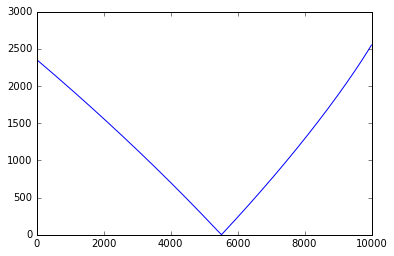

5519
2.66968932186


In [46]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

n = 10000
err = np.zeros(n)
for i in xrange(n):
    a = 1.*i/n
    x, y, circ = np.zeros(n), np.zeros(n), np.zeros(n)
    for j in xrange(n):
        t = 1.*j/n
        x[j] = (1-t)**3 + 3*t*(1-t)**2 + a*3*t**2*(1-t)
        y[j] = a*3*t*(1-t)**2 + 3*t**2*(1-t) + t**3
        circ[j] = np.sqrt(1 - x[j]**2)
        
    err[i] = np.sum(np.abs(y-circ))
    
    #plt.scatter(x, y, color='b')
    #plt.scatter(x, circ, color='g')
    #plt.axis('equal')
    #plt.show()

plt.plot(err)
plt.show()
print np.argmin(err)
print err[np.argmin(err)]

[  81.  162.]
[ 162.  243.]
[ 243.  243.]
[ 162.  324.]
[ 162.00000002  324.00000001]


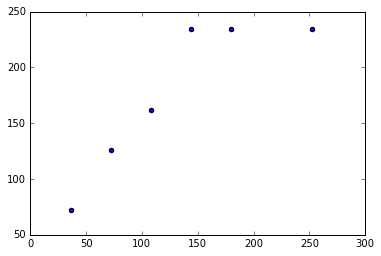

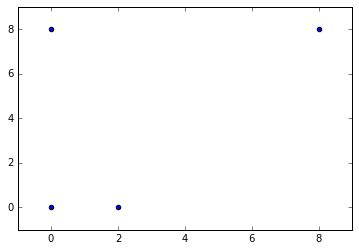

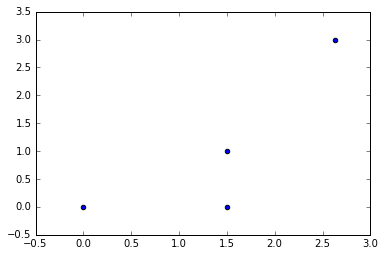

In [17]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

p00 = np.array([0,0.])
p01 = np.array([108.,216.])
p02 = np.array([216.,270.])
p03 = np.array([324.,162.])

p10 = 2/3.*p00 + 1/3.*p01
p11 = 2/3.*p01 + 1/3.*p02
p12 = 2/3.*p02 + 1/3.*p03

p20 = 2/3.*p10 + 1/3.*p11
p21 = 2/3.*p11 + 1/3.*p12

p30 = 2/3.*p20 + 1/3.*p21

print .25*p00 + .75*p01
print .5*p01 + .5*p02
print .75*p02 + .25*p03

pts = np.vstack((p10, p11, p12, p20, p21, p30))

print 1.5*p01
print 1.5*(p02 - .3333333333*p03)

plt.scatter(pts[:,0], pts[:,1])
plt.show()

plt.scatter([0,2,0,8],[0,0,8,8])
plt.show()
plt.scatter([0,1.5,1.5,2.625],[0,0,1,3])
plt.show()

In [10]:
import numpy as np
import itertools
from scipy import linalg as la

ed = {0:np.array([0,1,-1]), 1:np.array([1,-1,1]), -1:np.array([0,1,1])}


for x in itertools.permutations([0,1,-1]):
    A = np.vstack((ed[x[0]].T, ed[x[1]].T, ed[x[2]].T)).T
    d = np.diag(np.array(x))
    
    print np.dot(A,np.dot(d, la.inv(A))), '\n\n'

[[ 1.   0.   0. ]
 [-1.  -0.5 -0.5]
 [ 1.  -0.5 -0.5]] 


[[ 1.   0.   0. ]
 [-1.  -0.5 -0.5]
 [ 1.  -0.5 -0.5]] 


[[ 1.   0.   0. ]
 [-1.  -0.5 -0.5]
 [ 1.  -0.5 -0.5]] 


[[ 1.   0.   0. ]
 [-1.  -0.5 -0.5]
 [ 1.  -0.5 -0.5]] 


[[ 1.   0.   0. ]
 [-1.  -0.5 -0.5]
 [ 1.  -0.5 -0.5]] 


[[ 1.   0.   0. ]
 [-1.  -0.5 -0.5]
 [ 1.  -0.5 -0.5]] 




In [6]:
names = ['Deadlift', 'Squat', 'Bench', 'OHP']
maxes = [260, 240, 130, 90]
for i in xrange(len(maxes)):
    print names[i]+':'
    for j in [1, 0.85, 0.8, 0.75, 0.7, 0.65]:
        print '\t', j, ': ', j*maxes[i]
    print '\n'

Deadlift:
	1 :  260
	0.85 :  221.0
	0.8 :  208.0
	0.75 :  195.0
	0.7 :  182.0
	0.65 :  169.0


Squat:
	1 :  240
	0.85 :  204.0
	0.8 :  192.0
	0.75 :  180.0
	0.7 :  168.0
	0.65 :  156.0


Bench:
	1 :  130
	0.85 :  110.5
	0.8 :  104.0
	0.75 :  97.5
	0.7 :  91.0
	0.65 :  84.5


OHP:
	1 :  90
	0.85 :  76.5
	0.8 :  72.0
	0.75 :  67.5
	0.7 :  63.0
	0.65 :  58.5




In [8]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-1,1,100)
y = np.zeros(100)
y[:50] = -10000*x[:50]**2
y[50:] = 0.0001*x[50:]**2
plt.plot(x,y)
plt.show()

In [9]:
import re

Names = {'Babbage':'Charles','Berners-Lee':'Tim','Boole':'George',
         'Cerf':'Vint','Dijkstra':'Edsger','Hopper':'Grace',
         'Knuth':'Donald','von Neumann':'John','Russel':'Betrand',
         'Shannon':'Claude','Turing':'Alan'};

lastname = 'A'
try:
    Names[lastname]
except:
    to_return = {}
    for key in Names:
        if key.startswith(lastname):
            to_return[key] = Names[key]
    if len(to_return) > 0:
        print to_return
    else:
        print "failed"

failed


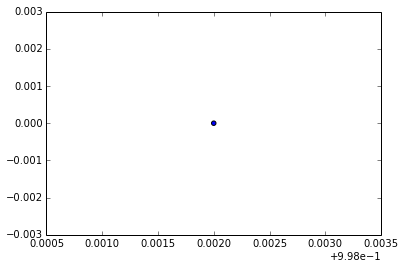

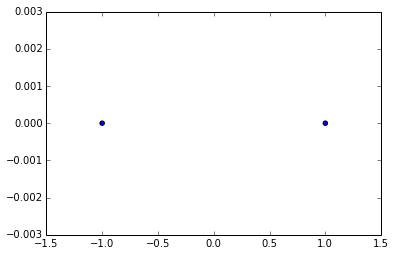

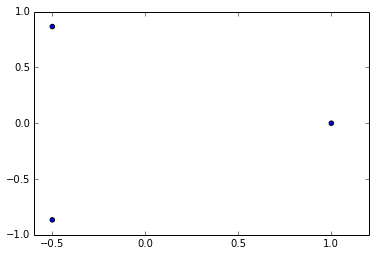

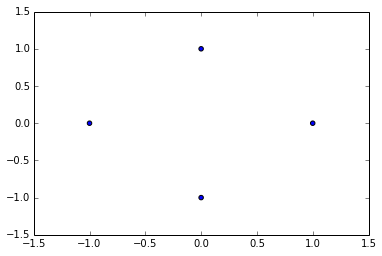

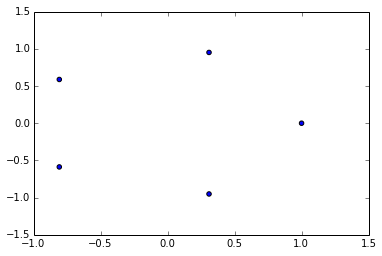

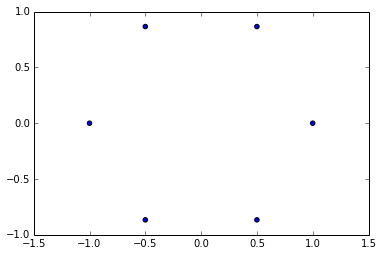

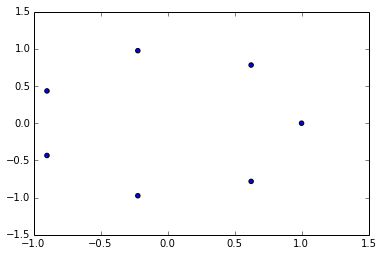

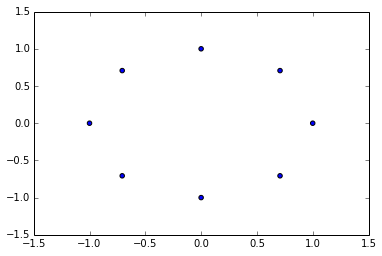

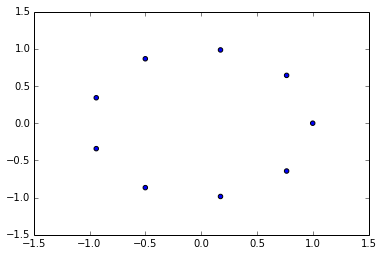

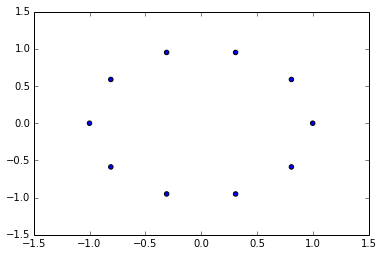

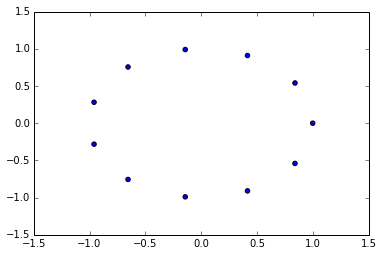

In [5]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
%matplotlib inline



In [50]:
def find_missing(mylist):
    outputstring = ""
    missingprev = False
    missingnext = True
    first = True

    for i in xrange(100):
        if len(mylist)>0:
            if i == mylist[0]:
                del mylist[0]
                missingprev = False

        else:
            if len(mylist) > 0:
                if i + 1 == mylist[0]:
                    missingnext = False
            else:
                missingnext = True

            if missingprev == False and missingnext == False:
                if first == False:
                    outputstring += ","
                outputstring += str(i)
            if missingprev == False and missingnext:
                if first == False:
                    outputstring += ","
                outputstring += str(i)
                outputstring += "-"
            if missingprev and missingnext == False:
                outputstring += str(i)
            if missingprev and missingnext:
                if i == 99:
                    outputstring += str(i)

            first = False
            missingprev = True
    return outputstring


print find_missing([0,1,2,50,75])

76-99


In [32]:
# Allowed to use addition, subtraction, and multiplication
def divide(a, b, t):
    # Come up with some cases to reduce it to a < b, both positive

    dividend = 0
    curr_error = t + 1
    k = 0
    while curr_error > t:
        i = 0
        
        while b > a:
            i += 1
            b -= a
        a *= 0.1
    
        i = i*10.0**(-k)
        if i > 0:
            curr_error = i
        dividend += i
        k += 1
    
    return dividend

print divide(17, 1450000, .000001)
print 1450000/17.

85294.117647
85294.1176471


TypeError: object of type 'int' has no len()

In [12]:
import numpy as np
Mr = np.array([[1,0,1,0],[0,1,0,1],[1,0,1,0],[0,1,0,1]])
A = np.array([[1,1,1],[0,1,1],[1,1,1]])
B = np.array([[1,0,0,1],[0,1,1,0],[0,1,1,0],[1,0,0,1]])
C = np.array([[1,1,1,0],[1,1,1,0],[1,1,1,0],[0,0,0,1]])
D = np.array([[1,1,0,0],[0,1,1,1],[1,0,1,1],[1,0,0,1]])

def transclosure(Mr):
    n = Mr.shape[0]
    A = Mr
    B = np.copy(A)
    for i in xrange(2,n+1):
        A = np.dot(A,Mr)
        A[A>1] = 1
        B += A
        B[B>1] = 1
    return B
       
print D
print transclosure(D)

[[1 1 0 0]
 [0 1 1 1]
 [1 0 1 1]
 [1 0 0 1]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [7]:
def digysum(n):
    strn = str(n)
    listn = []
    for i in xrange(len(strn)):
        listn.append(int(strn[i]))
    while len(listn)>1:
        newn = sum(listn)
        strnew = str(newn)
        listn = []
        for i in xrange(len(strnew)):
            listn.append(int(strnew[i]))
    print listn[0]
   
# Method that would be faster in not-Python
def digsum(n):
    while n >= 10:
        mysum = 0
        while n > 0 :
            remainder = n % 10
            mysum += remainder
            n /= 10
        n = mysum
    print mysum


6
6


In [9]:
from scipy import linalg as la
import numpy as np

print 1/.6847
print 42429.21305/(28284.978*np.cos(0.6847028))
print 42429.21305/(np.cos(0.6847028))
print 42429.21305+42429.21305**2*np.tan(.6847)/28284.978

1.46049364685
1.93654543114
54775.1449159
94394.2757114


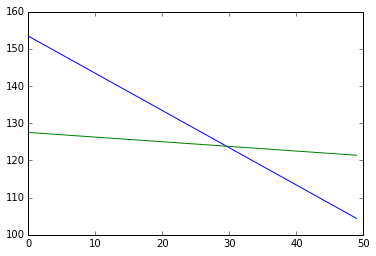

124.4 123.88875
123.4 123.76375


In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

weight = np.empty(50)
fat = np.empty(50)
lean = np.empty(50)
ideal = np.empty(50)

weight[0] = 153.4
fat[0] = 0.335*weight[0]
lean[0] = weight[0] - fat[0]

for i in xrange(50):
    weight[i] = weight[0] - i
    fat[i] = fat[0] - .9*i
    lean[i] = lean[0] - .1*i
    ideal[i] = lean[i]/.8
    
x = np.arange(50)
plt.plot(x, weight, x, ideal)
plt.show()

print weight[29], ideal[29]
print weight[30], ideal[30]

In [15]:
import numpy as np

def check(y):
    if type(y) == np.ndarray and y.size != 1:
        print "Run the y is a 1d array case"
    else:
        print "Run the other case"
        
check(3.4)
check(3)
check(np.array([3]))
check(np.array([3.4]))
check(np.array([3.0,3.4]))

Run the other case
Run the other case
Run the other case
Run the other case
Run the y is a 1d array case


In [33]:
# Out of 20. Can affect grade up to 1.1%
hw_pts_left = 16
# Out of 300
test_pts_left = 271
# Out of 100
lab_pts_left = 100

# 100 on lab, 19-20/20 on hw, 269/300 on test = A
# 100 on lab, 18/20 on hw, 270/300 on test = A
# 100 on lab, 16-17/20 on hw, 271/300 on test = A


myhw = 8*4+2+8+4+12+7
hwtotal = 9*4+8+20+8+9+12.0

test_score = (test_pts_left + 218)/540.0*.5
lab_score = (lab_pts_left + 300 + 98 + 74)/600.0*.45
hw_score = (hw_pts_left + myhw)/hwtotal*.05

grade = test_score + lab_score + hw_score
print grade

0.925326164875


In [7]:
def spellchecker(dictionary, document):
    """Dictionary is a set, document is a string"""
    misspelled = []
    words = document.split()
    for i in xrange(len(words)):
        if words[i] not in dictionary:
            misspelled.append(words[i])
            
    print misspelled
    
dictionary = {'if', 'is', 'in', 'of', 'be', 'bugs', 'the', 'then', 'them', 'must'}
document = 'if debugging is the process of removing bugs, then programming must be the process of putting them in.'

spellchecker(dictionary, document)

['if', 'debugging', 'is', 'the', 'process', 'of', 'removing', 'bugs,', 'then', 'programming', 'must', 'be', 'the', 'process', 'of', 'putting', 'them', 'in.']
['debugging', 'process', 'removing', 'bugs,', 'programming', 'process', 'putting', 'in.']


In [3]:
def mystery(n):
    if n == 2:
        return 4
    else:
        print 'Calling mystery(', n/2,')'
        return n*n*mystery(n/2)
    
mystery(4)

Calling mystery( 4 )


64

In [2]:
def sum(n):
    """Computes the sum of the integers from 0 to n."""
    if n == 0:
        return 0 
    else:
        return sum(n-1) + n
    
sum(10)

55

In [18]:
import sympy as sy
from __future__ import division

x = sy.symbols('x')
L1 = sy.expand(-(x-2)*(x-3)*(x-4)/6)
L2 = sy.expand((x-1)*(x-3)*(x-4)/2)
L3 = sy.expand(-(x-1)*(x-2)*(x-4)/2)
L4 = sy.expand((x-1)*(x-2)*(x-3)/6)
print L1, '\n', L2, '\n', L3, '\n', L4, '\n'

L = 2*L1 + 3*L2 + 5*L3 + 7*L4
print L
f = lambda t:-t**3/6 + 3*t**2/2 - 7*t/3 + 3
print f(1), f(2), f(3), f(4)

-x**3/6 + 3*x**2/2 - 13*x/3 + 4 
x**3/2 - 4*x**2 + 19*x/2 - 6 
-x**3/2 + 7*x**2/2 - 7*x + 4 
x**3/6 - x**2 + 11*x/6 - 1 

-x**3/6 + 3*x**2/2 - 7*x/3 + 3
2.0 3.0 5.0 7.0


In [24]:
N0 = 1
N1 = x-1
N2 = sy.expand((x-1)*(x-2))
N3 = sy.expand((x-1)*(x-2)*(x-3))
print N0, '\n', N1, '\n', N2, '\n', N3, '\n'
b0, b1, b2, b3 = 2, 1, 1/2, -1/6
print b0*N0+b1*N1+b2*N2+b3*N3

1 
x - 1 
x**2 - 3*x + 2 
x**3 - 6*x**2 + 11*x - 6 

-0.166666666666667*x**3 + 1.5*x**2 - 2.33333333333333*x + 3.0


In [1]:
works = []
for a in xrange(489):
    for b in xrange(489):
        if a**2+b**2 == 488:
            works.append((a,b))
print works

[(2, 22), (22, 2)]


In [32]:
import numpy as np

# Implementation found on the internet.
def egcd(a, b):
    x,y, u,v = 0,1, 1,0
    while a != 0:
        q, r = b//a, b%a
        m, n = x-u*q, y-v*q
        b,a, x,y, u,v = a,r, u,v, m,n
    gcd = b
    return gcd, x, y

# Version I implemented myself. Slower, but I understand it.
def euclid(a,b):
    r = a % b
    used = [a]
    while r > 0:
        rk = r
        r = b % r
        used.append(b)
        b = rk
    gcd = b
    n = len(used)
    coeffs = np.zeros(n,dtype=np.int32)
    coeffs[-1] = -1*np.floor(used[-2]/used[-1])
    coeffs[-2] = 1
    for i in xrange(2,n):
        temp = np.zeros(n,dtype=np.int32)
        temp[-i] = -np.floor(used[-i-1]/used[-i])
        temp[-i-1] = 1
        coeffs[-i] += temp[-i]*coeffs[-i+1]
        coeffs[-i-1] += coeffs[-i+1]
    return gcd, coeffs[0], coeffs[1]

%timeit egcd(323,204)    
%timeit euclid(323,204)

100000 loops, best of 3: 5.99 µs per loop
10000 loops, best of 3: 53.8 µs per loop


In [35]:
import numpy as np

b = np.array([2,-4,1]).T
A = np.array([[1,1,1],[0,1,3],[0,0,1]])

p1 = b
p2 = np.dot(A,p1)
p3 = np.dot(A,p2)
p4 = np.dot(A,p3)

print p1,p2,p3,p4

[ 2 -4  1] [-1 -1  1] [-1  2  1] [2 5 1]


In [19]:
# KKT conditions homework

from scipy import optimize as opt
import numpy as np
f = lambda x:-1*x[0]*x[1]
constr = ({'type':'ineq', 'fun': lambda x:-x[0]-x[1]**2+2},{'type':'ineq', 'fun': lambda x:x[0]}, {'type':'ineq', 'fun': lambda x:x[1]})
sol1 = opt.minimize(f, np.array([0.5,0.5]), method="SLSQP", constraints=constr)

g = lambda x:x[0]**2+x[1]**2-2*x[0]-7*x[1]
constr2 = ({'type':'ineq','fun':lambda x:-x[1]+5*x[0]**2},{'type':'ineq','fun':lambda x:10-10*x[0]-x[1]})
sol2 = opt.minimize(f, np.array([1.0,0.0]), method='SLSQP', constraints=constr2)

h = lambda x:-x[0]**2-6*x[0]*x[1]+2*x[0]+2*x[1]
cons=({'type':'ineq','fun':lambda x:1-x[0]**2-2*x[1]},{'type':'ineq','fun':lambda x:1-2*x[0]+2*x[1]})
sol3 = opt.minimize(h, np.array([0.0,0.0]),method='SLSQP',constraints=cons)
print sol3.x

[-2.73205081 -3.23205081]


In [4]:
# Too lazy to multiply matrices by hand to see what their index is

import numpy as np
A = np.array([[1,0,0],[0,0,1],[0,0,0]])
B = np.array([[0,1,1],[0,0,1],[0,0,0]])
A2 = np.dot(A,A)
B2 = np.dot(B,B)
print B2
print np.dot(B2,B)

[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [7]:
# Made an arithmetic mistake doing a Lagrange multipliers problem, got gross

from scipy import linalg as la
import numpy as np

A = np.array([[2,2,0,1,4],[2,6,0,2,0],[0,0,0,0,5],[1,2,0,0,0],[4,0,5,0,0]])
b = np.array([-4,0,-6,3,6])

B = np.array([[2,2,0],[2,6,0],[0,0,0]])
U, s, Vh = la.svd(B)

def x1(y):
    return (10-1/8)*y

def x2(y):
    return (10+1/8)*y

def l(x,y):
    return (-4*x-3*y)/(2*x)

y1 = 8/np.sqrt(6305)
y2 = 8/np.sqrt(6625)7/sqrt

sol1 = np.array([x1(y1),y1,l(x1(y1),y1)])
sol2 = np.array([x1(-y1),-y1,l(x1(-y1),-y1)])
sol3 = np.array([x2(y2),y2,l(x2(y2),y2)])
sol4 = np.array([x2(-y2),-y2,l(x2(-y2),-y2)])

print sol1
print sol2
print sol3
print sol4

[ 1.00750554  0.10075055 -2.15      ]
[-1.00750554 -0.10075055 -2.15      ]
[ 0.98287219  0.09828722 -2.15      ]
[-0.98287219 -0.09828722 -2.15      ]


In [29]:
# Doing a problem from the group rep take home midterm the hard way that didn't
# even work anyway

import numpy as np
from __future__ import division
from numpy import linalg as la

v1 = np.array([1,1,1,1])
v2 = np.array([1,-1,1,-1])
v3 = np.array([1,-1,-1,1])
v4 = np.array([-1,-1,1,1])

pi0 = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]],dtype='float32')
a = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1],[0,0,1,0]],dtype='float32')
b = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,0,0,0]],dtype='float32')
one = np.eye(4)
a2 = np.dot(a,a)
a3 = np.dot(a2,a)

g1 = one
g2 = a
g3 = a2
g4 = a3
g5 = b
g6 = np.dot(a,b)
g7 = np.dot(a2,b)
g8 = np.dot(a3,b)
#print g1, '\n', g2, '\n', g3, '\n', g4, '\n', g5, '\n', g6,'\n',g7, '\n', g8

pi_raw = np.dot(np.dot(g1,pi0),la.inv(g1)) + np.dot(np.dot(g2,pi0),la.inv(g2)) + np.dot(np.dot(g3,pi0),la.inv(g3)) + np.dot(np.dot(g4,pi0),la.inv(g4)) + np.dot(np.dot(g5,pi0),la.inv(g5)) + np.dot(np.dot(g6,pi0),la.inv(g6)) + np.dot(np.dot(g7,pi0),la.inv(g7)) + np.dot(np.dot(g8,pi0),la.inv(g8))
pi_raw = pi_raw/8.0
c1 = np.dot(v1,pi_raw)
c2 = np.dot(v2,pi_raw)
c3 = np.dot(v3,pi_raw)
c4 = np.dot(v4,pi_raw)
pi = np.vstack((c1,c2,c3,c4))
print pi

alt1 = np.dot(v1,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v1,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v1,np.dot(np.dot(g2,pi0),la.inv(g2))) + np.dot(v1,np.dot(np.dot(g3,pi0),la.inv(g3))) + np.dot(v1,np.dot(np.dot(g4,pi0),la.inv(g4))) + np.dot(v1,np.dot(np.dot(g5,pi0),la.inv(g5))) + np.dot(v1,np.dot(np.dot(g6,pi0),la.inv(g6))) + np.dot(v1,np.dot(np.dot(g7,pi0),la.inv(g7))) + np.dot(v1,np.dot(np.dot(g8,pi0),la.inv(g8)))
alt2 = np.dot(v2,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v2,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v2,np.dot(np.dot(g2,pi0),la.inv(g2))) + np.dot(v2,np.dot(np.dot(g3,pi0),la.inv(g3))) + np.dot(v2,np.dot(np.dot(g4,pi0),la.inv(g4))) + np.dot(v2,np.dot(np.dot(g5,pi0),la.inv(g5))) + np.dot(v2,np.dot(np.dot(g6,pi0),la.inv(g6))) + np.dot(v2,np.dot(np.dot(g7,pi0),la.inv(g7))) + np.dot(v2,np.dot(np.dot(g8,pi0),la.inv(g8)))
alt3 = np.dot(v3,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v3,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v3,np.dot(np.dot(g2,pi0),la.inv(g2))) + np.dot(v3,np.dot(np.dot(g3,pi0),la.inv(g3))) + np.dot(v3,np.dot(np.dot(g4,pi0),la.inv(g4))) + np.dot(v3,np.dot(np.dot(g5,pi0),la.inv(g5))) + np.dot(v3,np.dot(np.dot(g6,pi0),la.inv(g6))) + np.dot(v3,np.dot(np.dot(g7,pi0),la.inv(g7))) + np.dot(v3,np.dot(np.dot(g8,pi0),la.inv(g8)))
alt4 = np.dot(v4,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v4,np.dot(np.dot(g1,pi0),la.inv(g1))) + np.dot(v4,np.dot(np.dot(g2,pi0),la.inv(g2))) + np.dot(v4,np.dot(np.dot(g3,pi0),la.inv(g3))) + np.dot(v4,np.dot(np.dot(g4,pi0),la.inv(g4))) + np.dot(v4,np.dot(np.dot(g5,pi0),la.inv(g5))) + np.dot(v4,np.dot(np.dot(g6,pi0),la.inv(g6))) + np.dot(v4,np.dot(np.dot(g7,pi0),la.inv(g7))) + np.dot(v4,np.dot(np.dot(g8,pi0),la.inv(g8)))

print np.dot(np.dot(g5,pi0),la.inv(g5))

[[ 0.75  0.75  0.25  0.25]
 [ 0.75 -0.75  0.25 -0.25]
 [ 0.75 -0.75 -0.25  0.25]
 [-0.75 -0.75  0.25  0.25]]
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


In [20]:
# Newton's Method/Secant method homework 

import numpy as np 

def my_log(x, b, iters=50):
    # I can do this with lists if ndarrays aren't allowed but it's painfully slow
    a = np.zeros(iters)
    a[0] = (x/10+1)
    a[1] = (x/10)
    a[2] = (a[0] - (b**a[1]-x)*(a[1]-a[0])/(b**a[1]-b**a[0]))
    for i in xrange(2, iters-1):
        a[i+1] = a[i] - (b**a[i]-x)*(a[i]-a[i-1])/(b**a[i]-b**a[i-1])
    a = a[~np.isnan(a)]
    return a[-1]

def my_newton(x_0, epsilon, Df, D2f, maxiters=100):
    x_1 = x_0 - Df(x_0)/D2f(x_0)
    iters = 1
    while abs(x_1-x_0) >= x_0*epsilon and iters < maxiters:
        x_0 = x_1
        x_1 = x_1 - Df(x_1)/D2f(x_1)
        iters += 1
    if abs(x_1-x_0) <= abs(x_0*epsilon):
        return x_1
    else:
        return 'Convergence not achieved in ' + str(maxiters) + ' iterations.'
    
def my_secant(x_0, x_1, epsilon, Df, maxiters=100):
    old = x_0
    now = x_1
    new = now - Df(now)*(now-old)/(Df(now)-Df(old))
    iters = 1
    while abs(new - now) < abs(now*epsilon) and iters < maxiters:
        temp = new
        new = now - Df(now)*(now-old)/(Df(now)-Df(old))
        old = now
        now = temp
    if abs(new - now) <= abs(now*epsilon):
        return new
    else:
        return 'Convergence not achieved in ' + str(maxiters) + ' iterations.'

0.0

In [3]:
# Newton/Secant homework, continued

import math
x = 150.0
b = 5.0
guess = my_log(x, b)
actual = math.log(x, b)
print guess, actual

Df = lambda x:2*x
D2f = lambda x:2
my_newton(100.0, 0.001, Df, D2f)

3.11328275256 3.11328275256


In [12]:
import numpy as np
from scipy import linalg as la

Fx_0 = np.array([[np.pi-np.pi**2+7],[np.pi-np.pi**2+7]])
Fx = np.array([np.pi-np.pi**2+7,np.pi-np.pi**2+7])
DF = np.array([[1,-2*np.pi],[-2*np.pi, 1]])

U, s1, Vh = la.svd(Fx_0)
norm1 = la.norm(Fx)
print norm1
U, s2, Vh = la.svd(DF)
norm2 = 1/s2[1]**2
print norm2
print norm1*norm2*4

0.384649475492
0.0358268241795
0.0551230765168


In [1]:
import numpy as np
A = np.array([[1,2],[3,4],[5,6]])
Q = np.array([[0.3,0.1,0],[0.1,0.4,0],[0,0,0.5]])
b = np.array([[2.1],[3.8],[4.5]])

Qinv = np.linalg.inv(Q)
blob = np.dot(A.T, np.dot(Qinv, A))
blobinv = np.linalg.inv(blob)
xhat = np.dot(blobinv, np.dot(A.T, np.dot(Qinv, b)))
print xhat

[[-0.85]
 [ 1.5 ]]


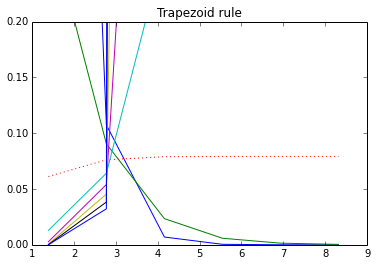

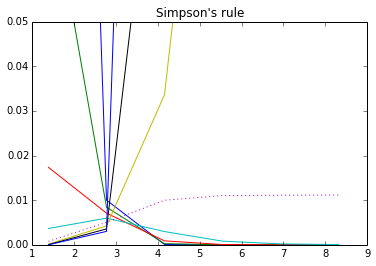

"\nNotice that the dotted lines corresponding to h^2 and h^4 for Trapezoid rule and Simpson's rule, respectively, are the \nclosest  to straight (especially as n increases),  so these are the best empirical estimates for the order of the error.\n"

In [33]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

h = float(19)/np.array([4,16,64,256,1024,4096])
etrap = np.array([1.3803, 0.1074, 6.9562e-3, 4.3600e-4, 2.7255e-5, 1.7034e-6])
esimp = np.array([0.3914, 0.0100, 7.7541e-5, 3.3449e-7, 1.3162e-9, 5.1585e-12])

'''
Estimate k for various values of a (assuming error = k*h^a). The 
correct value for a should yield a straight line.
'''

for i in xrange(8):
    k_trap = etrap / h_n**i
    if i != 2:
        plt.plot(np.log(n), k_trap)
    if i == 2:
        plt.plot(np.log(n), k_trap, linestyle=':')
plt.ylim([0,0.2])
plt.title('Trapezoid rule')
plt.show()

for i in xrange(8):
    k_simp = esimp / h_n**i
    if i != 4:
        plt.plot(np.log(n), k_simp)
    if i == 4:
        plt.plot(np.log(n), k_simp, linestyle=':')
plt.ylim([0,0.05])
plt.title("Simpson's rule")
plt.show()

'''
Notice that the dotted lines corresponding to h^2 and h^4 for Trapezoid 
rule and Simpson's rule, respectively, are the closest  to straight 
(especially as n increases),  so these are the best empirical estimates 
for the order of the error.
'''

In [1]:
def f(x):
    return -4 - 2*x + 2*x**2 - 2*x**3
for x in [-1,0,1,2]:
    print str(x) + ': ' + str(f(x))

-1: 2
0: -4
1: -6
2: -16


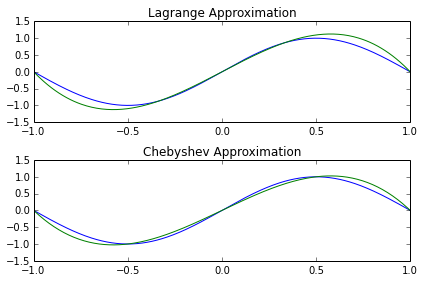

In [32]:
import math as m
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

c = -1.0*m.sqrt(3)/16.0*27.0
x = np.linspace(-1,1,300)
y1 = c*(x**3-x)
y2 = -1.0*8.0/3.0*(x**3-x)
y = np.sin(np.pi*x)
plt.subplot(211)
plt.title('Lagrange Approximation')
plt.plot(x,y,x,y1)
plt.subplot(212)
plt.title('Chebyshev Approximation')
plt.plot(x,y,x,y2)
plt.tight_layout()
plt.show()

In [29]:
for i in xrange(4):
    print i
    x = np.cos(i*np.pi/3)
    print 'x_i: ' + str(x)
    print 'y_i: ' + str(np.sin(x*np.pi)) + '\n'

0
x_i: 1.0
y_i: 1.22464679915e-16

1
x_i: 0.5
y_i: 1.0

2
x_i: -0.5
y_i: -1.0

3
x_i: -1.0
y_i: -1.22464679915e-16



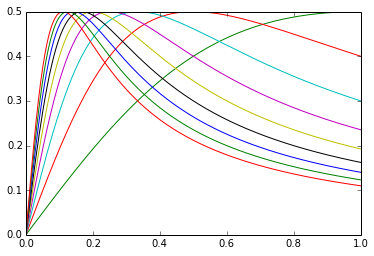

In [17]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def f(n, x):
    num = float(n)*x
    denom = 1+float(n*n)*x*x
    return num/denom

domain = np.linspace(0,1,300)
for i in xrange(10):
    plt.plot(domain, f(i,domain))
plt.show()

In [24]:
my_list = [32, 27, -5, -11, 13]
my_list[3]=float(my_list[3])
del my_list[2]
print my_list
sorted(my_list, reverse=True

[32, 27, -11.0, 13]


[32, 27, 13, -11.0]

In [1]:
print max(4, 3, 9)

9


In [9]:
def unimodal_max(x):
    n = len(x)
    if n == 1:
        return x[0]
    elif n == 2:
        if x[0] < x[1]:
            return x[1]
        if x[0] > x[1]:
            return x[0]
    else:
        if x[n/2] < x[n/2+1]:
            return unimodal_max(x[n/2:])
        if x[n/2] > x[n/2+1]:
            return unimodal_max(x[0:n/2])
    
x = [1,3,7,8,9,10,13,12,11,8]
print unimodal_max(x)

13


In [7]:
def gcd(a,b):
    r = a % b
    if r == 0:
        return b
    else:
        return gcd(b,r)

17

In [9]:
def inv(a, n):
    r = a
    count = 1
    while r != 1 and count < n:
        r += a
        if r > n:
            r -= n
        count += 1
    if r != 1:
        print 'a is not a unit in this ring'
    else:
        print count

inv(42,223)

154


In [53]:
import numpy as np  

# W is the maximum weight, items is a list of tuples (item, value)
def max_value(W, items):
    n = len(items)
    # Initialize n by W array (but use W+1 because we want entries 0 through W)
    V = np.zeros((n, W+1))
    def _recur_find(i,w):
        # Base case
        if w == 0 or i == -1:
            return 0
        else:
            # Get v_i and w_i from items to make code cleaner looking
            v_i = items[i][1]
            w_i = items[i][0]
            # Make sure we don't try to run the algorithm on a negative weight by using two cases
            if w >= w_i:
                # Algorithm given
                V[i,w] = max(_recur_find(i-1,w), v_i + _recur_find(i-1,w-w_i))
            if w < w_i:
                # If w < w_i then the second thing will come out zero and doesn't matter
                V[i,w] = _recur_find(i-1,w)
            return V[i,w]
    return _recur_find(n-1, W)

items = [(3, 5), (2, 2), (1, 2), (5,10)]
max_value(11, items)

19.0

In [43]:
def cancer(spec, sens, prev):
    num = sens*prev
    denom = sens*prev + (1-spec)*(1-prev)
    return num/denom

print 'Varying specificities from 90% to 99.9%'
for i in [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,0.999]:
    print str(i) + ': ' + str(cancer(i, 0.95, 0.004))

print 'Varying sensitivities from 90% to 99.9%'
for i in [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,0.999]:
    print str(i) + ': ' + str(cancer(.95, i, 0.004)) 
    
print 'Varying prevalence from 0.1% to 5%'
for i in [.001, .002, .003, .004, .005, .01, .015, .02, .025, .03, .035, .04, .045, .05]:
    print str(i) + ': ' + str(cancer(.95, .95, i))

Varying specificities from 90% to 99.9%
0.9: 0.036750483559
0.91: 0.0406678082192
0.92: 0.0455198850024
0.93: 0.0516866158868
0.94: 0.059786028949
0.95: 0.0708955223881
0.96: 0.0870760769936
0.97: 0.112826603325
0.98: 0.160202360877
0.99: 0.276162790698
0.995: 0.432801822323
0.999: 0.792326939116
Varying sensitivities from 90% to 99.9%
0.9: 0.0674157303371
0.91: 0.0681137724551
0.92: 0.0688107703815
0.93: 0.0695067264574
0.94: 0.0702016430172
0.95: 0.0708955223881
0.96: 0.0715883668904
0.97: 0.0722801788376
0.98: 0.0729709605361
0.99: 0.0736607142857
0.995: 0.0740052063964
0.999: 0.0742806156592
Varying prevalence from 0.1% to 5%
0.001: 0.0186640471513
0.002: 0.0366795366795
0.003: 0.0540796963947
0.004: 0.0708955223881
0.005: 0.0871559633028
0.01: 0.161016949153
0.015: 0.224409448819
0.02: 0.279411764706
0.025: 0.327586206897
0.03: 0.37012987013
0.035: 0.407975460123
0.04: 0.441860465116
0.045: 0.472375690608
0.05: 0.5


In [38]:
0.8*0.1/(0.8*0.1+0.2*0.9)

0.30769230769230776

In [39]:
(1.0/250000000)/(1.0/250000000+1.0/3000000*(1.0-1.0/250000000))

0.011857707556749834

In [2]:
import math as m
import numpy as np

b1 = 42.0*m.sqrt(3.0)/193.0 + 175.0/386.0
b2 = -3.0/386.0*(35.0*m.sqrt(3.0)-104.0)
b3 = b2
b4 = -b1

a1 = m.sqrt(3.0)
a2 = 5.0/m.sqrt(3.0)
a3 = 4.0/m.sqrt(3.0)
a4 = 0
a5 = 1.0-5.0/m.sqrt(3.0)
a6 = 5.5-5.0/(2*m.sqrt(3.0))
a7 = 0
a8 = -2.0-4.0/m.sqrt(3.0)
a9 = -5.5-5.0/(2*m.sqrt(3.0))

A = np.array([[a1,a2,a3],[a4,a5,a6],[a7,a8,a9]])
B = np.array([[1,0,0],[0,b1,b2],[0,b3,b4]])

result = A.dot(B)
print result

[[ 1.73205081  3.17542648 -0.94424551]
 [ 0.         -0.1989165  -4.00427069]
 [ 0.         -5.91892122  4.31216515]]


In [4]:
import scipy.stats
scipy.stats.gamma.cdf(4,1,scale=1.0/3.0)

0.99999385578764666

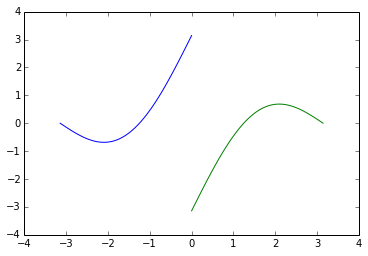

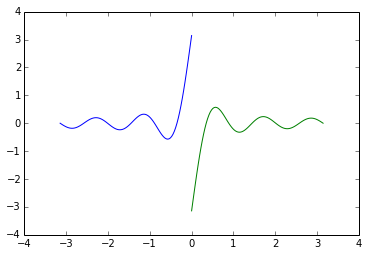

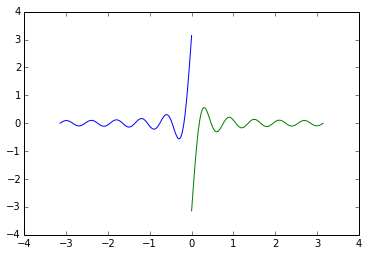

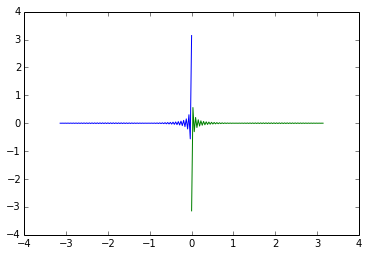

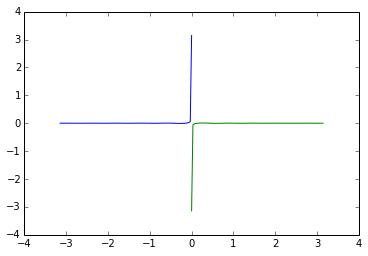

In [26]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
 
def plot_g(n):
    # We are plotting in two parts because it is a piecewise function
    x1 = np.linspace(-np.pi,0, 100)
    # First we set up our domain
    x2 = np.linspace(0, np.pi, 100)
    # Initialize our sum things, in two pieces because piecewise
    y1 = 2 * np.sin(x1)
    # We can't just start with an empty thing, Python doesn't like that
    y2 = 2 * np.sin(x2)
    # Iterate through the rest of the sum, starting at 2 and going up to (but not including) n+1
    for k in xrange(2, n+1):
        # Add 2/k*sin(kx) to the first bit
        y1 += (2. / k) * np.sin(k * x1)
        # Add 2/k*sin(kx) to the second bit
        y2 += (2. / k) * np.sin(k * x2)
    # Subtract f(x) from our approximation, -pi to 0 case
    z1 = y1 + np.pi + x1
    # Subtract f(x) from our approximation, 0 to pi case
    z2 = y2 - np.pi + x2
    # Set up the plot
    plt.plot(x1, z1, x2, z2)
    plt.show()

plot_g(1)
plot_g(5)
plot_g(10)
plot_g(100)
plot_g(1000)

In [31]:
import scipy
def f(x):
    return np.sin(x)/float(x)
x = np.linspace(0, np.pi, 100)
2*scipy.integrate.quad(f(x), 0, np.pi)[0]-np.pi

TypeError: only length-1 arrays can be converted to Python scalars